# [Lab Session 2](otsu.ipynb)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

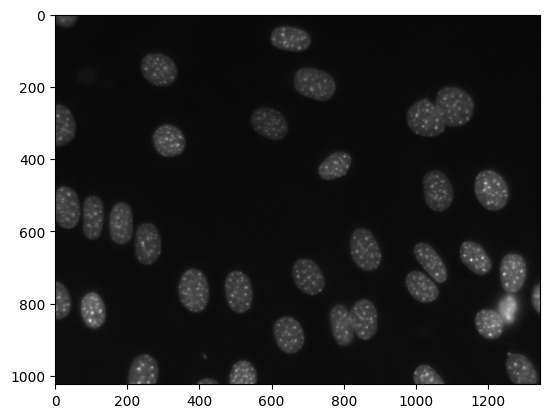

In [ ]:
imgf = plt.imread('data/NIH3T3/im/dna-0.png')
plt.imshow(imgf, 'gray')

**[Task 1.2.]()** Quantify the image into 256 bins:

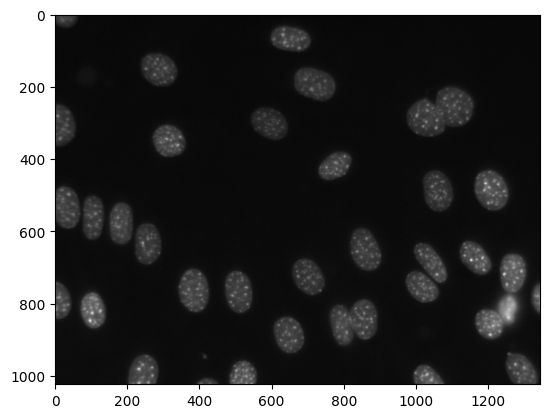

In [32]:
img8 = (imgf * 255).round().astype(np.uint8)
plt.imshow(img8, 'gray')


**[Task 1.3.]()** Compute the image histogram:

<BarContainer object of 256 artists>

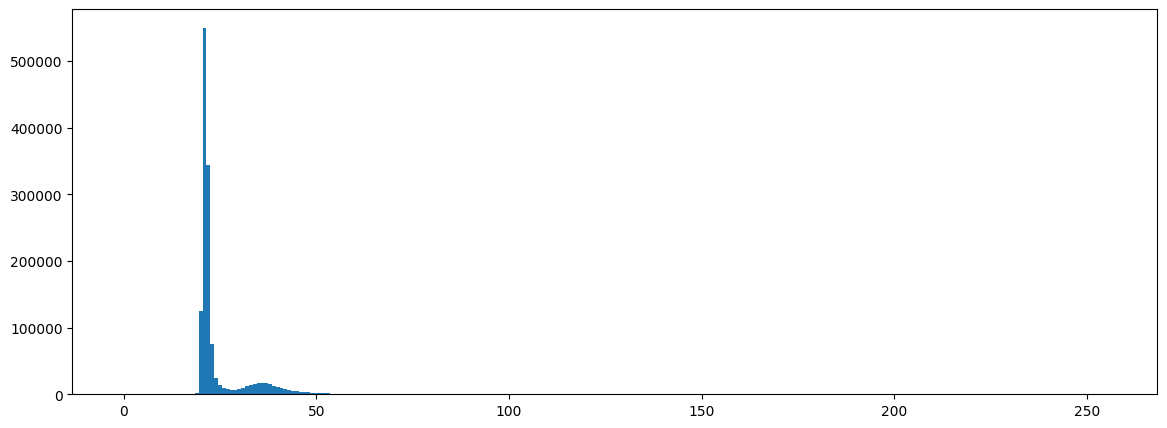

In [33]:
h = np.zeros(256)
for i in range (256):
    h[i] = np.sum(img8 == i)
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)


Show the computed histogram:

<BarContainer object of 256 artists>

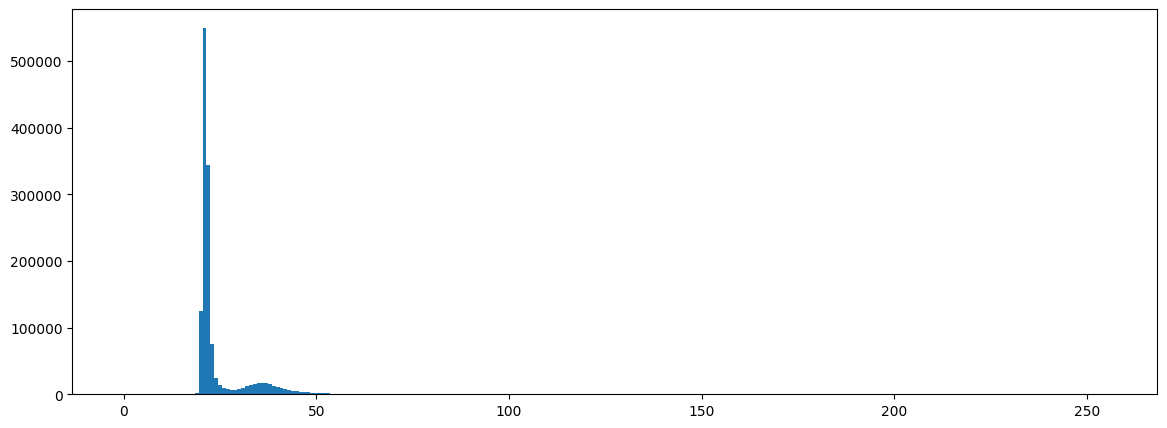

In [34]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

**[Task 1.5.]()** Perform Otsu thresholding:

Optimal threshold: 31


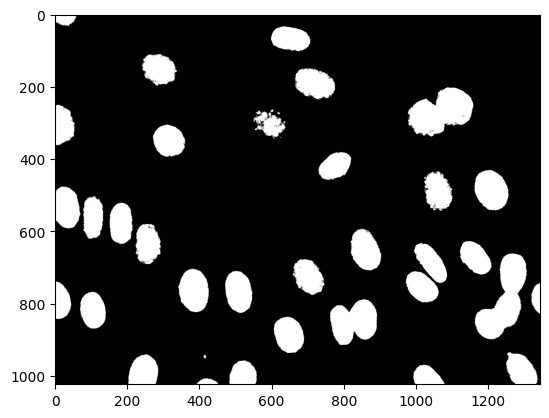

In [40]:
sum_all = np.dot(np.arange(256), h) #alle bins (Intensitätswerte) summieren, mit Gewichtung, h = histogram, an Stelle 21 mal h (Anzahl der Vorkommen von I 21), dot = Multiplikation 
sum_B = 0
w_B = 0 #background
w_F = 0 #foreground
max_variance = 0
optimal_threshold = 0

total_pixels = img8.size

#iteration über den arr<
for T in range(1, 256):
    w_B += h[T - 1]
    w_F = total_pixels - w_B
    if w_B == 0 or w_F == 0:
        continue

    sum_B += (T - 1) * h[T - 1] #-1, weil bei 0 anfängt, Gewichtung mit [indx]
    mean_B = sum_B / w_B
    mean_F = (sum_all - sum_B) / w_F #sum_all = Formel Vorlesung mean intensity mit Gewichtung 

    var_B = np.sum(((np.arange(T) - mean_B) ** 2) * h[:T]) / w_B #Formel von Vorlesung
    var_F = np.sum(((np.arange(T, 256) - mean_F) ** 2) * h[T:]) / w_F #Formel von Vorlesung

    within_class_variance = w_B * var_B + w_F * var_F
    
    if within_class_variance < max_variance or max_variance == 0: #minimieren
        max_variance = within_class_variance
        optimal_threshold = T

print(f'Optimal threshold: {optimal_threshold}')



# Step 6: Apply the optimal threshold to segment the image
segmented_img = img8 >= optimal_threshold

plt.imshow(segmented_img, 'gray')



**[Task 1.6.]()** Compute the Dice coefficient:

In [41]:
img_ref = plt.imread('data/NIH3T3/im/dna-0.png')
dice_coef = 2*((binary_img**ground_truth).sum()) / (binary_img.sum()+ground_truth.sum())
print(dice_coef)

NameError: name 'binary_img' is not defined